In [ ]:
!pip install kmodes

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

# 1. Data preparation

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


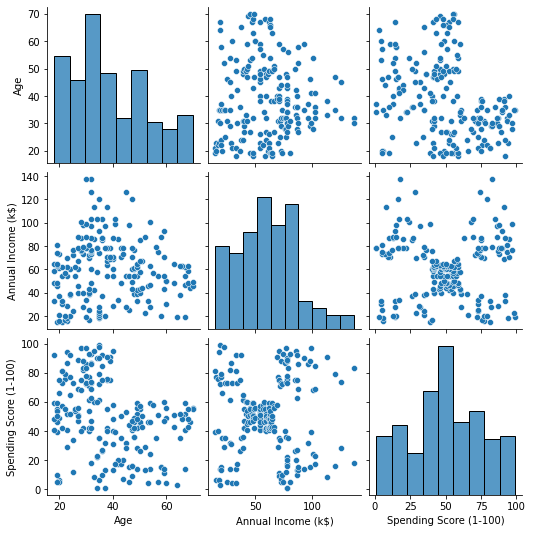

In [ ]:
# Histogram of numerical variables
sns.pairplot(df.iloc[:, 2:])

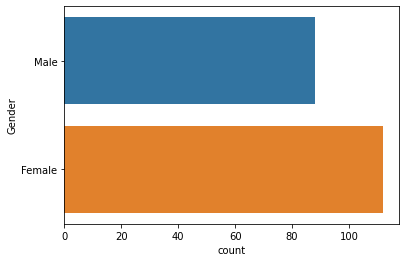

In [ ]:
# Gender count
sns.countplot(y = 'Gender' , data = df)

In [ ]:
# standardizing data
scaled_df = df.copy()
columns_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaled_df[columns_to_normalize] = scaled_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / np.std(x))

# Drop ID variable
scaled_df = scaled_df.iloc[:, 1:]

Text(0.5, 0, 'Number of clusters')

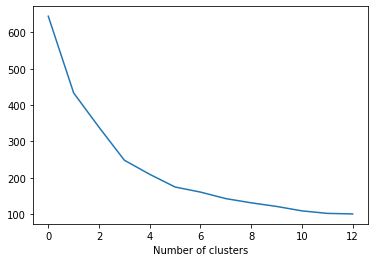

In [ ]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1, 14)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang')
    kproto.fit_predict(scaled_df, categorical=[0])
    cost.append(kproto.cost_)
    
plt.plot(cost)
plt.xlabel('Number of clusters')

In [ ]:
# The optimal number of clusters is 5
kproto = KPrototypes(n_clusters=5, init='Huang', random_state=42)
kproto.fit_predict(scaled_df, categorical=[0])
df['cluster'] = kproto.labels_

In [ ]:
# Giving our clusters meaningful names
df['cluster_label'] = df['cluster'].apply(lambda x: 'Most Valuable' if x == 0 else 
                                                    'Target' if x == 1 else
                                                    'Very Valuable' if x == 2 else
                                                    'Valuable' if x == 3 else 'Less Valuable')

# New column for radar plots a bit later on 
df['Sex (100=Male)'] = df['Gender'].apply(lambda x: 100 if x == 'Male' else 0)

In [ ]:
radar_df = df.groupby('cluster_label')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Sex (100=Male)']].mean().reset_index()
radar_df.head()

,cluster_label,Age,Annual Income (k$),Spending Score (1-100),Sex (100=Male)
0,Less Valuable,55.551724,48.482759,41.775862,43.103448
1,Most Valuable,32.692308,86.538462,82.128205,46.153846
2,Target,41.264706,88.500000,16.764706,58.823529
3,Valuable,27.957447,50.000000,44.638298,34.042553
4,Very Valuable,25.272727,25.727273,79.363636,40.909091


In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(radar_df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black',fontfamily='serif',fontweight='light', size=8)
    #ax.set_xticks([]) # turn labels off if you want - can look quite nice

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30,40,50,75,100], ["10","20","30","40","50","75","100"], color="grey", size=4)
    plt.ylim(0,100)

    # Ind1
    values=radar_df.loc[row].drop('cluster_label').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=10, fontfamily='serif',fontweight='bold', y=1.2)
    plt.tight_layout()

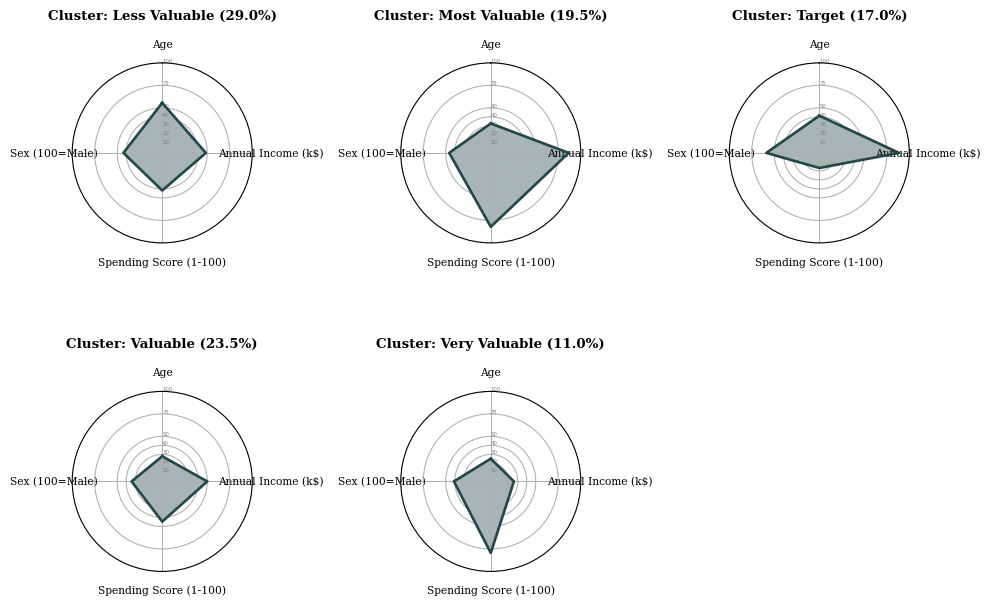

In [ ]:
my_dpi=96

plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("crest", len(radar_df.index))
 
# Loop to plot
for row in range(0, len(radar_df.index)):
    label_name = radar_df['cluster_label'][row]
    pct_customers = round((df['cluster_label'] == label_name).sum()/len(df)*100, 2)
    make_spider(row=row, title='Cluster: '+ label_name + ' (' + str(pct_customers)+ '%)', 
                color='#244747') #change this to my_palette if you want colour to vary by cluster
    

In [ ]:
df['cluster'] = df['cluster'].map(str)
# Order for plotting categorical vars
Cluster_ord = ['2','1','4','3','0']
clus_label_order = ['Target', 'Most Valuable', 'Very Valuable', 'Valuable', 'Less Valuable']

In [ ]:
clus_ord = df['cluster_label'].value_counts().index

clu_data = df['cluster_label'].value_counts()[clus_label_order]
##

data_cg = df.groupby('cluster_label')['Gender'].value_counts().unstack().loc[clus_label_order]
data_cg['sum'] = data_cg.sum(axis=1)

##
data_cg_ratio = (data_cg.T / data_cg['sum']).T[['Male', 'Female']][::-1]

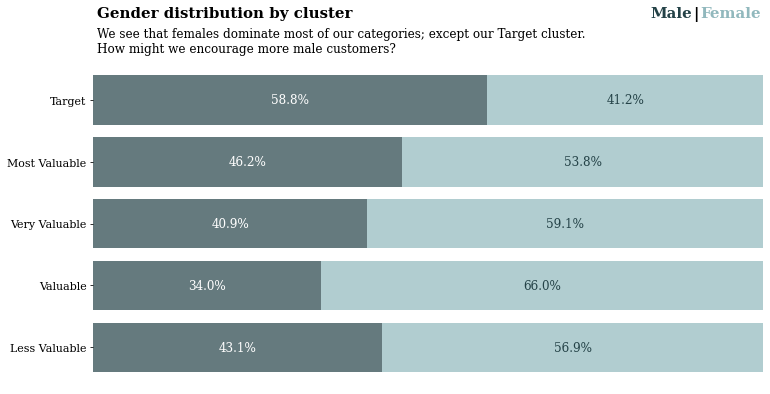

In [ ]:

fig, ax = plt.subplots(1,1,figsize=(12, 6),)

ax.barh(data_cg_ratio.index, data_cg_ratio['Male'], 
        color='#244247', alpha=0.7, label='Male')
ax.barh(data_cg_ratio.index, data_cg_ratio['Female'], left=data_cg_ratio['Male'], 
        color='#91b8bd', alpha=0.7, label='Female')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels((data_cg_ratio.index), fontfamily='serif', fontsize=11)


# male percentage
for i in data_cg_ratio.index:
    ax.annotate(f"{data_cg_ratio['Male'][i]*100:.3}%", 
                   xy=(data_cg_ratio['Male'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_cg_ratio.index:
    ax.annotate(f"{data_cg_ratio['Female'][i]*100:.3}%", 
                   xy=(data_cg_ratio['Male'][i]+data_cg_ratio['Female'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='#244247')
    

fig.text(0.129, 0.98, 'Gender distribution by cluster', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.129, 0.9, 
         '''
We see that females dominate most of our categories; except our Target cluster.
How might we encourage more male customers?''' , fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend().set_visible(False)

fig.text(0.77,0.98,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(0.819,0.98,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.827,0.98,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')
plt.show()